In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import tarfile
from skimage import data
from os import remove
from skimage.color import rgb2gray
from numpy import load
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from sklearn.model_selection import train_test_split
from google.colab import files
from keras.layers import Conv2D, Conv2DTranspose, Input, Flatten, Dense, Lambda, Reshape,ZeroPadding2D,Activation,MaxPooling2D,Dropout
from keras.layers import BatchNormalization
from keras.models import Model
from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
from keras.datasets import mnist
from keras.losses import binary_crossentropy
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SpatialDropout2D
from matplotlib import pyplot as plt
import keras

Using TensorFlow backend.


In [0]:
import os
os.chdir('/content/drive/My Drive/Minería de Datos/Train-Test 90%')

datos = load('/content/drive/My Drive/Minería de Datos/Train-Test 90%/datos_int.npz') ; datos = datos['arr_0']
sexo = load('/content/drive/My Drive/Minería de Datos/Train-Test 90%/sexo_int.npz') ; sexo = sexo['arr_0']

In [3]:
print('datos=',datos.shape)
print('sexo=',sexo.shape)

datos= (8869, 200, 200, 3)
sexo= (8869, 2)


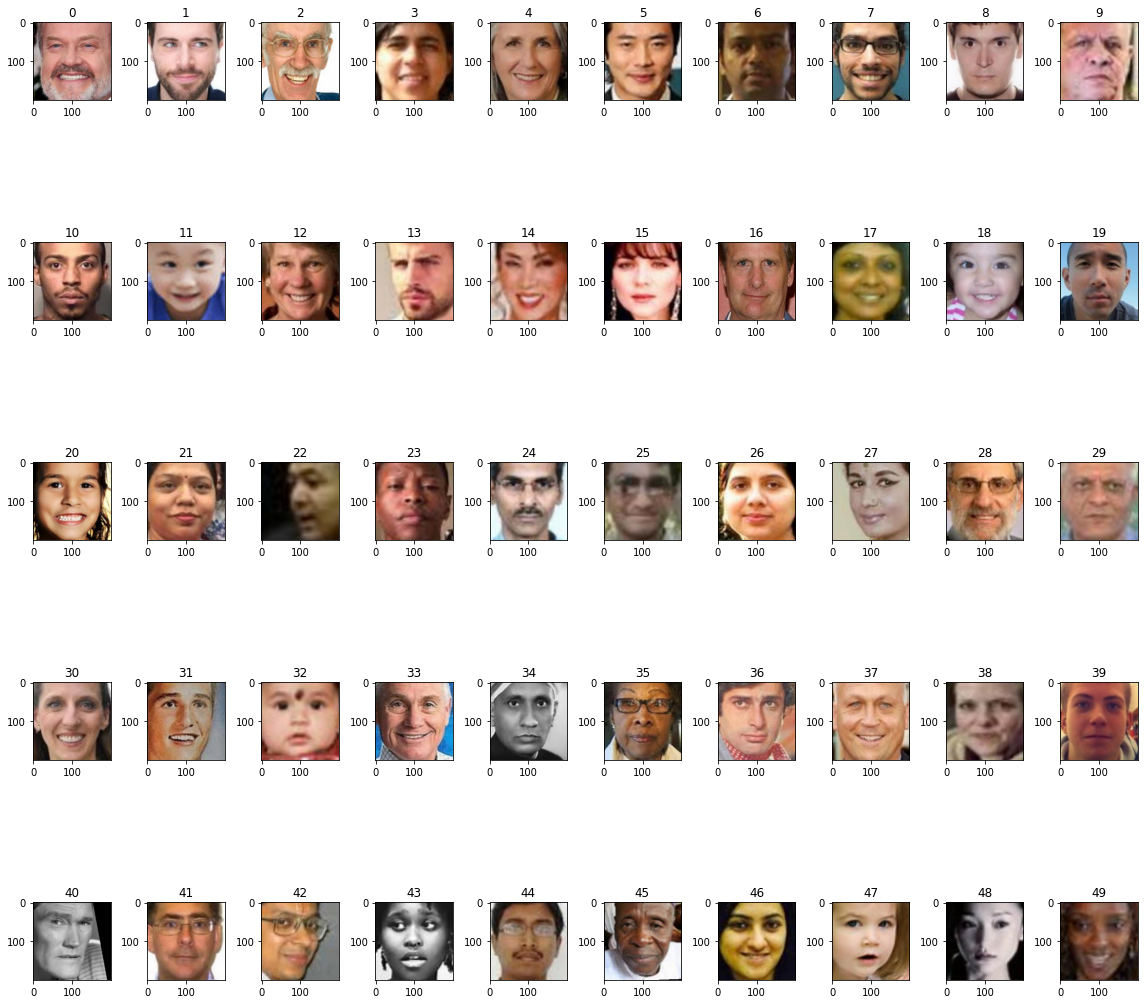

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 10, figsize=(16,16))
ax = axes.ravel()

for i in range(0,50):
  image = np.squeeze(datos[i])
  ax[i].imshow(image)
  ax[i].set_title(i)

fig.tight_layout()
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(datos, test_size=0.20, random_state=10)
y_train, y_test = train_test_split(sexo, test_size=0.20, random_state=10)

In [6]:
print('x_train =',x_train.shape)
print('x_test =',x_test.shape)
print('y_train =',y_train.shape)
print('y_test =',y_test.shape)

x_train = (7095, 200, 200, 3)
x_test = (1774, 200, 200, 3)
y_train = (7095, 2)
y_test = (1774, 2)


In [0]:
def model(input_shape):
    # Define the input placeholder. 
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (3, 3),padding='same',name='Conv32')(X) 
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    # MAXPOOL
    X = MaxPooling2D(name='max_pool_1')(X)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(64, (3, 3),padding='same',name='Conv64')(X) 
    X = BatchNormalization(axis = 3,)(X)
    X = Dropout(0.2)(X)
    X = Activation('relu')(X)
    # MAXPOOL
    X = MaxPooling2D(name='max_pool_2')(X)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(128, (3, 3),padding='same',name='Conv128')(X) 
    X = BatchNormalization(axis = 3)(X)
    X = Dropout(0.2)(X)
    X = Activation('relu')(X)
    # MAXPOOL
    X = MaxPooling2D(name='max_pool_3')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dropout(0.2)(X)
    X = Dense(2, activation='sigmoid', name='final')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='Sexo_Model')
    
    return model

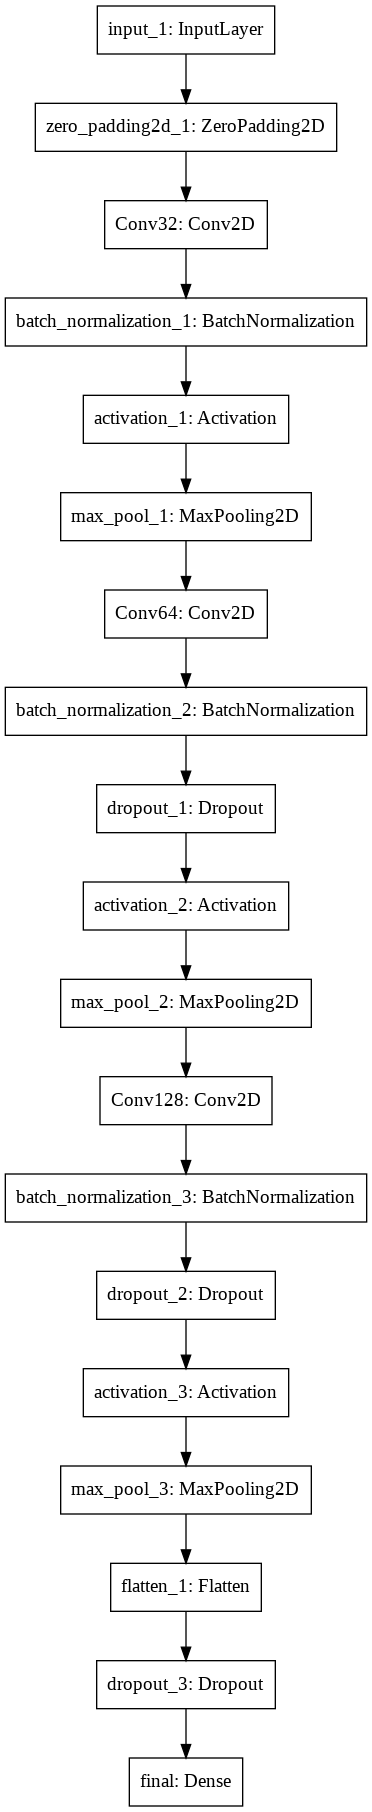

In [8]:
Modelo = model((200,200,3))
plot_model(Modelo)

In [9]:
Modelo.summary()

Model: "Sexo_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 206, 206, 3)       0         
_________________________________________________________________
Conv32 (Conv2D)              (None, 206, 206, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 206, 206, 32)      128       
_________________________________________________________________
activation_1 (Activation)    (None, 206, 206, 32)      0         
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 103, 103, 32)      0         
_________________________________________________________________
Conv64 (Conv2D)              (None, 103, 103, 64)      1

In [0]:
Modelo.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [11]:
history= Modelo.fit(x = x_train,y = y_train,validation_data=(x_test,y_test),epochs =40 ,batch_size = 32)

Train on 7095 samples, validate on 1774 samples
Epoch 1/40
7095/7095 [==============================] - 932s 131ms/step - loss: 0.9518 - accuracy: 0.7766 - val_loss: 0.8524 - val_accuracy: 0.5617
Epoch 2/40
7095/7095 [==============================] - 928s 131ms/step - loss: 0.3267 - accuracy: 0.8668 - val_loss: 0.5148 - val_accuracy: 0.7224
Epoch 3/40
7095/7095 [==============================] - 928s 131ms/step - loss: 0.2400 - accuracy: 0.9011 - val_loss: 0.3235 - val_accuracy: 0.8588
Epoch 4/40
7095/7095 [==============================] - 929s 131ms/step - loss: 0.2180 - accuracy: 0.9120 - val_loss: 0.3049 - val_accuracy: 0.8639
Epoch 5/40
7095/7095 [==============================] - 931s 131ms/step - loss: 0.1883 - accuracy: 0.9232 - val_loss: 0.4100 - val_accuracy: 0.8331
Epoch 6/40
7095/7095 [==============================] - 932s 131ms/step - loss: 0.1688 - accuracy: 0.9330 - val_loss: 0.2716 - val_accuracy: 0.8881
Epoch 7/40
7095/7095 [==============================] - 930s 131

In [13]:
preds = Modelo.evaluate(x = x_test,y = y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1774/1774 [==============================] - 66s 37ms/step

Loss = 0.47778722870645557
Test Accuracy = 0.8697857856750488


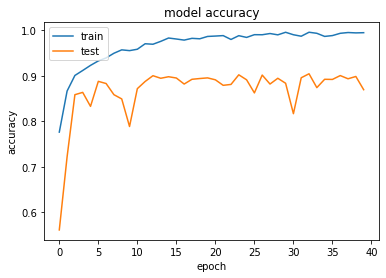

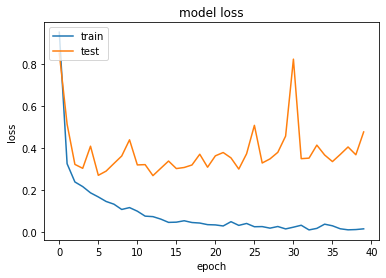

In [14]:
#print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
Modelo.save('/content/drive/My Drive/Minería de Datos/Train-Test 90%.modelo1_sexo_limpio.h5')


In [0]:
Modelo = keras.models.load_model('/content/drive/My Drive/Minería de Datos/Train-Test 90%.modelo1_sexo_limpio.h5')